Graficar un histograma agrupando por valor del atributo “province”.

In [166]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb

In [170]:
df_pasos = pd.read_json("../input/pasos.json")

In [171]:
df_pasos.sample(5)

,location,name,province
4,"[-51.6896359, -72.2993574]",PASO LAURITA CASAS VIEJAS,Santa Cruz
175,"[-27.7303477, -54.9169915]",PANAMBI - VERACRUZ,Misiones
247,"[-45.2213569, -71.3610803]",PASO PAMPA ALTA,Chubut
57,"[-38.7885986, -62.2710768]",PUERTO BAHIA BLANCA,Buenos Aires
237,"[-24.8027954, -59.2496609]",GRL BELGRANO - GRL BRUGUEZ,Chaco


In [172]:
df_pasos.dtypes

location    object
name        object
province    object
dtype: object

In [173]:
df_pasos.shape

(252, 3)

In [174]:
# listado de duplicados por nombre
df_pasos[df_pasos.name.duplicated(keep=False)].sort_values(by ='name')

,location,name,province
30,"[-45.7894354, -67.4696871]",AERO COMODORO RIVADAVIA,Chubut
31,"[-45.7894354, -67.4696871]",AERO COMODORO RIVADAVIA,Chubut
125,"[-31.3154367, -64.2145085]",AERO CORDOBA,Cordoba
122,"[-31.3154367, -64.2145085]",AERO CORDOBA,Cordoba
88,"[-34.5580305, -58.4191975]",AERO JORGE NEWBERY,Buenos Aires
89,"[-34.5580305, -58.4191975]",AERO JORGE NEWBERY,Buenos Aires
227,"[-37.9341161, -57.5745361]",AERO MAR DEL PLATA,Buenos Aires
63,"[-37.9341161, -57.5745361]",AERO MAR DEL PLATA,Buenos Aires
53,"[-38.9521333, -68.142673]",AERO NEUQUEN,Neuquen
54,"[-38.9521333, -68.142673]",AERO NEUQUEN,Neuquen


In [175]:
df_pasos_2 = df_pasos[df_pasos.name.duplicated(keep='first') == False]

ELiminamos los nombres duplicados

In [176]:
# verificamos que no hay mas duplicados por nombre
df_pasos_2[df_pasos_2.name.duplicated(keep=False)]

,location,name,province


In [177]:
#listamos registros con idéntica location
df_pasos_2[df_pasos_2.location.duplicated(keep=False)]

SystemError: <built-in function duplicated_object> returned a result with an error set

In [178]:
pd.set_option("display.precision", 7)

def serie_lat_lon(val):
    return pd.Series([val[0], val[1]])

df_pasos_new = df_pasos_2.copy()

df_pasos_new[['lat', 'lon']] = df_pasos_new['location'].apply(serie_lat_lon)

In [179]:
df_pasos_new.sample(5)

,location,name,province,lat,lon
137,"[-29.3178247, -70.0146428]",PASO PASCUA LAMA,San Juan,-29.3178247,-70.0146428
11,"[-52.1304141, -69.5198778]",INTEGRACION AUSTRAL,Santa Cruz,-52.1304141,-69.5198778
202,"[-26.4686865, -54.7158799]",PUERTO PIRAY,Misiones,-26.4686865,-54.7158799
71,"[-22.1902975, -64.6869445]",PASO EL CONDADO LAS MAMORAS,San Juan,-22.1902975,-64.6869445
158,"[-26.8358881, -65.1105502]",AEROPUERTO INTERNACIONAL TENIENTE GENERAL BENJ...,Tucuman,-26.8358881,-65.1105502


In [180]:
df_pasos_new.drop('location', axis=1, inplace = True)

Eliminamos la columna location

In [181]:
df_pasos_new.shape

(238, 4)

In [182]:
df_pasos_new[df_pasos_new.duplicated(keep = False)]

,name,province,lat,lon


Observamos que no hay registros con lat-lon identicos

In [183]:
print(sorted(df_pasos_new.province.unique()))

['Buenos Aires', 'Catamarca', 'Chaco', 'Chubut', 'Cordoba', 'Corrientes', 'Córdoba', 'Entre Rios', 'Formosa', 'Jujuy', 'La Rioja', 'Mendoza', 'Misiones', 'NEUQUEN', 'Neuquen', 'Rio Negro', 'Salta', 'San Juan', 'San Luis', 'Santa Cruz', 'Santa Fe', 'Santiago del Estero', 'Tierra del Fuego', 'Tucuman']


Observamos Neuquen repetido

In [184]:
def set_title(x):
    return x.title()

df_pasos_new['province'] = df_pasos_new['province'].apply(set_title)

In [185]:
print(sorted(df_pasos_new.province.unique()))

['Buenos Aires', 'Catamarca', 'Chaco', 'Chubut', 'Cordoba', 'Corrientes', 'Córdoba', 'Entre Rios', 'Formosa', 'Jujuy', 'La Rioja', 'Mendoza', 'Misiones', 'Neuquen', 'Rio Negro', 'Salta', 'San Juan', 'San Luis', 'Santa Cruz', 'Santa Fe', 'Santiago Del Estero', 'Tierra Del Fuego', 'Tucuman']


Observamos duplicado y mal escrito 'Córdoba'

In [186]:
df_pasos_new['province'].replace('Cordoba', 'Córdoba')
print(sorted(df_pasos_new.province.unique()))

['Buenos Aires', 'Catamarca', 'Chaco', 'Chubut', 'Cordoba', 'Corrientes', 'Córdoba', 'Entre Rios', 'Formosa', 'Jujuy', 'La Rioja', 'Mendoza', 'Misiones', 'Neuquen', 'Rio Negro', 'Salta', 'San Juan', 'San Luis', 'Santa Cruz', 'Santa Fe', 'Santiago Del Estero', 'Tierra Del Fuego', 'Tucuman']


In [187]:
len(df_pasos_new.province.unique())

23

In [188]:
df_pasos_new['province'].value_counts()

Buenos Aires           45
Misiones               38
Santa Cruz             19
Corrientes             15
Chubut                 14
Mendoza                13
Entre Rios             12
Formosa                11
Neuquen                10
Santa Fe                9
Tierra Del Fuego        9
Rio Negro               8
Jujuy                   8
Salta                   4
San Juan                4
Santiago Del Estero     4
La Rioja                3
Catamarca               3
Chaco                   3
Cordoba                 2
San Luis                2
Tucuman                 1
Córdoba                 1
Name: province, dtype: int64

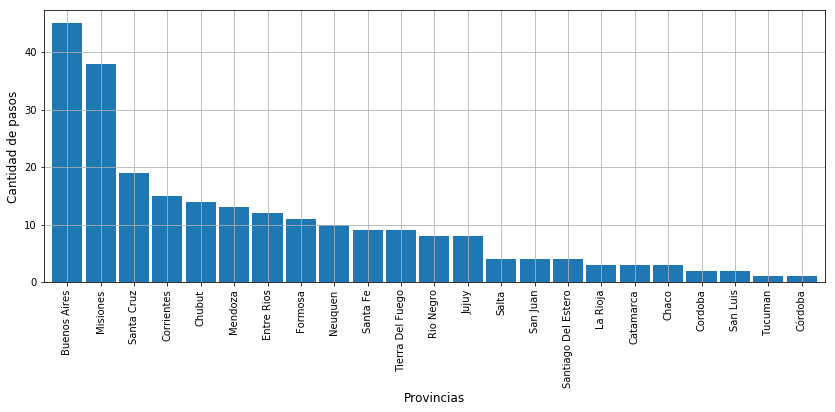

In [189]:
df_pasos_new['province'].value_counts().plot(kind='bar', figsize = (14, 5), grid = True, width = 0.9)

plt.xlabel('Provincias', fontsize = 12)
plt.ylabel('Cantidad de pasos', fontsize = 12)

plt.show()